<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/main/Russian_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repository cloning

In [ ]:
!git clone https://github.com/Derinhelm/parser_stat.git

Cloning into 'parser_stat'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 94 (delta 48), reused 51 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 24.40 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (17/17), done.


In [ ]:
import sys
sys.path.append('/content/parser_stat')

In [ ]:
!mkdir pics

# Data getting

In [ ]:
from data_classes import ConllEntry, Sentence

In [ ]:
import pickle

In [ ]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [ ]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [ ]:
treebank_names = ['gsd', 'pud', 'syntagrus', 'poetry', 'taiga']

# Parsing result getting

In [ ]:
import pandas as pd

In [ ]:
parser_names = ["udpipe", "stanza", "natasha", "deeppavlov", "spacy"]

In [ ]:
parser_res = {}
for p in parser_names:
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

In [ ]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][95].tokens]

[('1', '4', 'obl'),
 ('2', '4', 'case'),
 ('3', '4', 'amod'),
 ('4', '0', 'root'),
 ('5', '4', 'nsubj'),
 ('6', '5', 'flat:foreign'),
 ('7', '5', 'flat:foreign'),
 ('8', '5', 'flat:foreign'),
 ('9', '5', 'flat:foreign'),
 ('10', '4', 'punct'),
 ('1', '2', 'punct'),
 ('2', '4', 'parataxis'),
 ('3', '2', 'punct'),
 ('4', '0', 'root'),
 ('5', '4', 'xcomp'),
 ('6', '5', 'obj'),
 ('7', '8', 'amod'),
 ('8', '6', 'nmod'),
 ('9', '4', 'punct')]

In [ ]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [ ]:
parser_res['stanza']['syntagrus'][95].sent_id

'2003Armeniya.xml_96'

In [ ]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

gsd udpipe 7
gsd stanza 5
gsd natasha 83
gsd deeppavlov 18
gsd spacy 14
pud udpipe 7
pud stanza 4
pud natasha 98
pud deeppavlov 3
pud spacy 18
syntagrus udpipe 57
syntagrus stanza 190
syntagrus natasha 1073
syntagrus deeppavlov 131
syntagrus spacy 220
poetry udpipe 43
poetry stanza 65
poetry natasha 148
poetry deeppavlov 50
poetry spacy 24
taiga udpipe 42
taiga stanza 69
taiga natasha 95
taiga deeppavlov 67
taiga spacy 69


In [ ]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [ ]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '3', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '9', 'punct'),
 ('9', '3', 'conj'),
 ('10', '9', 'nmod'),
 ('11', '12', 'punct'),
 ('12', '10', 'parataxis'),
 ('13',

In [ ]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [ ]:
for t in treebank_names:
  for p in parser_names:
    for s in parser_res[p][t]:
      shift_token_id(s)

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Creating token start-end pairs

be_edges - set of dependency tree edges in begin-end format

In [ ]:
def create_sent_be_nodes(sent, text_transform):
    token_begin_end = []
    sent_text = text_transform(sent.text)
    original_sent_text = text_transform(sent.text)
    del_prefix_len = 0
    tokens = [t for t in sent.tokens if '.' not in t.id]
    for t_i, t in enumerate(tokens):
        token_text = text_transform(t.form)
        t_start = sent_text.find(token_text)
        if t_start == -1:
            print("Error:", sent.sent_id, f"sent_text:{sent_text}, t:{token_text}", t_i)
        else:
            b, e = (del_prefix_len + t_start,
                                  del_prefix_len + t_start + len(token_text))
            token_begin_end.append((t, (b, e)))
            del_prefix_len += t_start + len(token_text)
            sent_text = sent_text[t_start + len(token_text):]
            assert text_transform(original_sent_text[b:e]) == text_transform(tokens[t_i].form)
    sent_text = text_transform(sent.text)
    return token_begin_end

In [ ]:
def create_sent_be_edges(sent_be_tokens):
    sent_be_res = {}
    for t_id, (t, t_be) in enumerate(sent_be_tokens): # ellipsis are deleted, so index in sent_be_tokens = token_id
      parent_id = t.parent_id
      if parent_id == '0': # root
        parent_be = (-1, -1)
      else:
        _, parent_be = sent_be_tokens[int(parent_id) - 1]
      sent_be_res[t_be] = (parent_be, t.relation)
    return sent_be_res

In [ ]:
from collections import OrderedDict

In [ ]:
be_treebanks = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

{(0, 2): ((16, 20), 'nsubj'),

 (3, 15): ((16, 20), 'advmod'),

 (16, 20): ((-1, -1), 'root'),

 (21, 24): ((25, 34), 'det'),

 (25, 34): ((16, 20), 'obj'),

 (35, 43): ((16, 20), 'advmod'),

 (43, 44): ((16, 20), 'punct')}


In [ ]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_96']

{(0, 3): ((11, 15), 'obl'),
 (4, 5): ((11, 15), 'case'),
 (6, 10): ((11, 15), 'amod'),
 (11, 15): ((-1, -1), 'root'),
 (16, 24): ((11, 15), 'nsubj'),
 (25, 33): ((16, 24), 'flat:foreign'),
 (34, 42): ((16, 24), 'flat:foreign'),
 (43, 50): ((16, 24), 'flat:foreign'),
 (51, 54): ((16, 24), 'flat:foreign'),
 (54, 55): ((11, 15), 'punct'),
 (56, 57): ((57, 64), 'punct'),
 (57, 64): ((66, 72), 'parataxis'),
 (64, 65): ((57, 64), 'punct'),
 (66, 72): ((-1, -1), 'root'),
 (73, 86): ((66, 72), 'xcomp'),
 (87, 93): ((73, 86), 'obj'),
 (94, 105): ((106, 111), 'amod'),
 (106, 111): ((87, 93), 'nmod'),
 (111, 112): ((66, 72), 'punct')}

((0, 2), ((16, 20), 'nsubj')),

((3, 9), ((16, 20), 'obl')),

((9, 10), ((10, 15), 'punct')),

((10, 15), ((3, 9), 'conj')),

((16, 20), ((-1, -1), 'root')),

((21, 24), ((25, 34), 'det')),

((25, 34), ((16, 20), 'obj')),

((35, 43), ((16, 20), 'advmod')),

((43, 44), ((16, 20), 'punct'))]

# Sentence statistics

In [ ]:
def calculate_stat(be_gold, be_res_p):
  stat_list = []
  for sent_id in be_gold:
    extra_gold = len(be_gold[sent_id].keys() - be_res_p[sent_id].keys())
    extra_parser = len(be_res_p[sent_id].keys() - be_gold[sent_id].keys())
    tokenisation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()})
    parent_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be][0] == be_gold[sent_id][t_be][0]})
    relation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be] == be_gold[sent_id][t_be]})
    stat_list.append((sent_id, extra_gold, extra_parser, tokenisation_matched,
                      parent_matched, relation_matched, len(be_gold[sent_id])))
  stat = pd.DataFrame(stat_list, columns=['sent_id', 'extra_gold', 'extra_parser', 'tokenisation_matched',
                                             'parent_matched', 'relation_matched', 'token_length'])

  align_uas_precision = stat['parent_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_uas_recall = stat['parent_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_las_precision = stat['relation_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_las_recall = stat['relation_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_uas_f = ((2 * align_uas_precision * align_uas_recall) / (align_uas_precision + align_uas_recall)).fillna(0.0)
  align_las_f = ((2 * align_las_precision * align_las_recall) / (align_las_precision + align_las_recall)).fillna(0.0)
  return align_uas_f, align_las_f

In [ ]:
align_uas_f = {treebank: {} for treebank in treebank_names}
align_las_f = {treebank: {} for treebank in treebank_names}
for treebank in treebank_names:
  for p in parser_names:
    align_uas_f[treebank][p], align_las_f[treebank][p] = \
        calculate_stat(be_treebanks[treebank], be_parser_res[p][treebank])
align_res = {"uas_f": align_uas_f,
             "las_f": align_las_f}

(0.48936170212765956, 0.48936170212765956)

(0.8723404255319149, 0.8723404255319149)

# Results

In [ ]:
from IPython.display import Latex
def create_latex(df):
  return df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
   ], overwrite=False).format(lambda s: s.replace("%", "\%")).to_latex(clines="all;data",  column_format="|l|l|l|l|l|l|")

In [ ]:
parser_titles = ["UDPipe", "Stanza", "Natasha", "DeepPavlov", "spacy"]
treebank_titles = ["GSD", "PUD", "SynTagRus", "Poetry", "Taiga"]

In [ ]:
import numpy as np

def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

##Mean values of sentence f-score

In [ ]:
'''uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)'''

'uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()\n                          for treebank in treebank_names] for p in parser_names],\n                        index=parser_titles, columns=treebank_titles)'

In [ ]:
uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

In [ ]:
uas_mean_df.round(2)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.79,0.86,0.88,0.72,0.73
stanza,0.85,0.93,0.94,0.82,0.79
natasha,0.79,0.88,0.83,0.64,0.70
deeppavlov,0.83,0.94,0.92,0.84,0.79
spacy,0.84,0.91,0.87,0.75,0.77


In [ ]:
'''las_mean_df = pd.DataFrame([[f"{align_las_f[treebank][p].mean() * 100:.0f}%"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)'''

'las_mean_df = pd.DataFrame([[f"{align_las_f[treebank][p].mean() * 100:.0f}%"\n                          for treebank in treebank_names] for p in parser_names],\n                        index=parser_titles, columns=treebank_titles)'

In [ ]:
las_mean_df = pd.DataFrame([[align_las_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

In [ ]:
las_mean_df.round(2)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.71,0.79,0.84,0.65,0.66
stanza,0.79,0.87,0.91,0.76,0.72
natasha,0.75,0.84,0.78,0.58,0.64
deeppavlov,0.75,0.86,0.89,0.78,0.72
spacy,0.80,0.87,0.82,0.69,0.70


In [ ]:
from matplotlib import colormaps

colors = colormaps["Set3"].colors[:1] + colormaps["Set3"].colors[2:3] + colormaps["Set3"].colors[4:]

parser_colors = {p:colors[i] for (i, p) in enumerate(parser_names)}


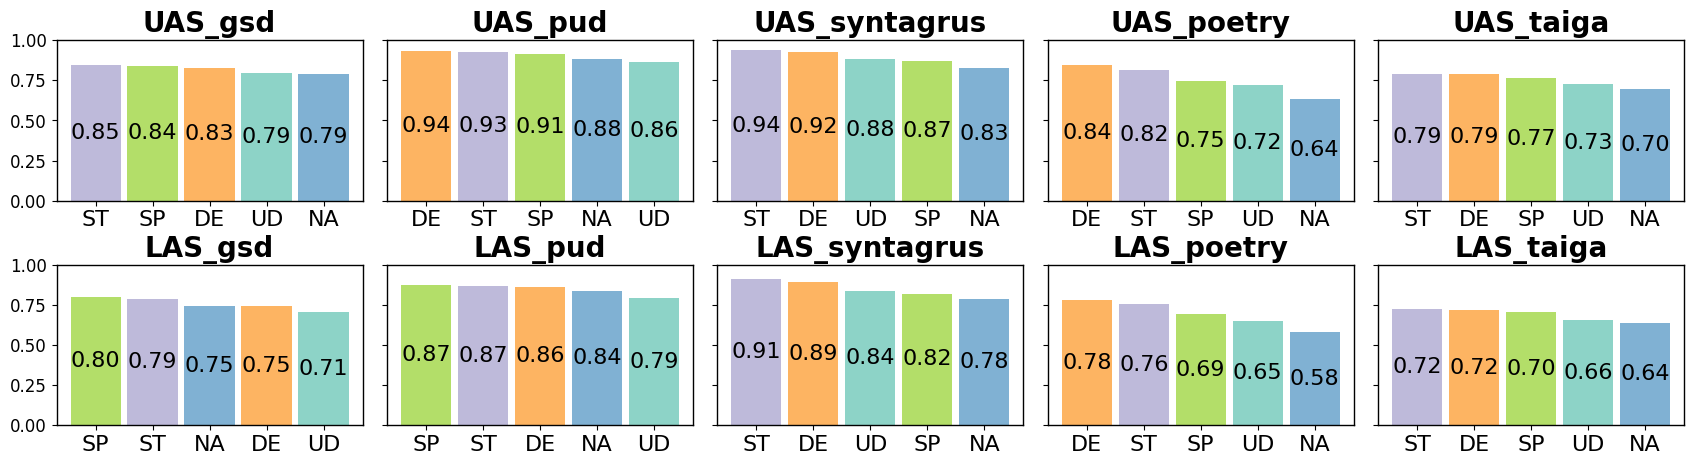

In [ ]:
import matplotlib.pyplot as plt

x_count = 2
y_count = 5

f, ax = plt.subplots(x_count, y_count, figsize=(21, 5), sharey=True)
plt.subplots_adjust(wspace=0.08, hspace=0.4)
for i, t in enumerate(treebank_names):
  u_titles, u_values = list(zip(*(sorted(dict(uas_mean_df[t]).items(), key=lambda x:-x[1]))))
  cur_ax = get_ax(ax, i, x_count, y_count)
  p = cur_ax.bar(u_titles, u_values, color = [parser_colors[p] for p in u_titles], width=0.88)
  cur_ax.bar_label(p, label_type='center', fmt=lambda v: f"{v:.2f}", size=16)
  cur_ax.set_title(f"UAS_{t}", size=20, weight="bold")
  cur_ax.set_ylim([0, 1.0])
  cur_ax.set_xticks(list(range(len(u_titles))), [p[:2].upper() for p in u_titles], fontdict={'fontsize':16})
for i, t in enumerate(treebank_names):
  l_titles, l_values = list(zip(*(sorted(dict(las_mean_df[t]).items(), key=lambda x:-x[1]))))
  cur_ax = get_ax(ax, i + 5, x_count, y_count)
  p = cur_ax.bar(l_titles, l_values, color = [parser_colors[p] for p in l_titles],
                 width=0.88)
  cur_ax.bar_label(p, label_type='center', fmt=lambda v: f"{v:.2f}", size=16)
  cur_ax.set_title(f"LAS_{t}", size=20, weight="bold")
  cur_ax.set_ylim([0, 1.0])
  cur_ax.set_xticks(list(range(len(l_titles))), [p[:2].upper() for p in l_titles], fontdict={'fontsize':16})
plt.savefig("/content/pics/sorted_mean.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
(uas_mean_df - las_mean_df).round(3)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.086,0.074,0.044,0.069,0.069
stanza,0.061,0.062,0.026,0.058,0.066
natasha,0.045,0.045,0.044,0.057,0.063
deeppavlov,0.082,0.072,0.031,0.062,0.071
spacy,0.042,0.041,0.049,0.056,0.063


In [ ]:
pd.DataFrame([[align_uas_f[treebank][p][align_uas_f[treebank][p] != 1.0].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.734168,0.811234,0.806364,0.621893,0.619080
stanza,0.781497,0.879523,0.863005,0.725730,0.686685
natasha,0.737493,0.837968,0.764756,0.556061,0.595433
deeppavlov,0.726613,0.882994,0.845861,0.744014,0.671519
spacy,0.774868,0.862218,0.796220,0.650021,0.652447


In [ ]:
pd.DataFrame([[align_las_f[treebank][p][align_las_f[treebank][p] != 1.0].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.684296,0.765011,0.780026,0.571925,0.581259
stanza,0.749976,0.834393,0.848188,0.682460,0.652098
natasha,0.708347,0.806350,0.736829,0.509648,0.562533
deeppavlov,0.708045,0.834248,0.831175,0.705536,0.637466
spacy,0.749284,0.835309,0.770841,0.609128,0.616990


##Std values of sentence f-score

In [ ]:
uas_std_df = pd.DataFrame([[align_uas_f[treebank][p].std()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

In [ ]:
uas_std_df.round(2)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.20,0.14,0.16,0.25,0.26
stanza,0.18,0.09,0.12,0.20,0.23
natasha,0.19,0.11,0.17,0.27,0.27
deeppavlov,0.26,0.09,0.13,0.20,0.25
spacy,0.18,0.10,0.17,0.26,0.25


In [ ]:
las_std_df = pd.DataFrame([[align_las_f[treebank][p].std()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

In [ ]:
las_std_df.round(2)

,gsd,pud,syntagrus,poetry,taiga
udpipe,0.20,0.15,0.17,0.26,0.27
stanza,0.18,0.11,0.13,0.21,0.24
natasha,0.20,0.13,0.18,0.27,0.28
deeppavlov,0.25,0.11,0.14,0.21,0.25
spacy,0.18,0.11,0.18,0.27,0.26


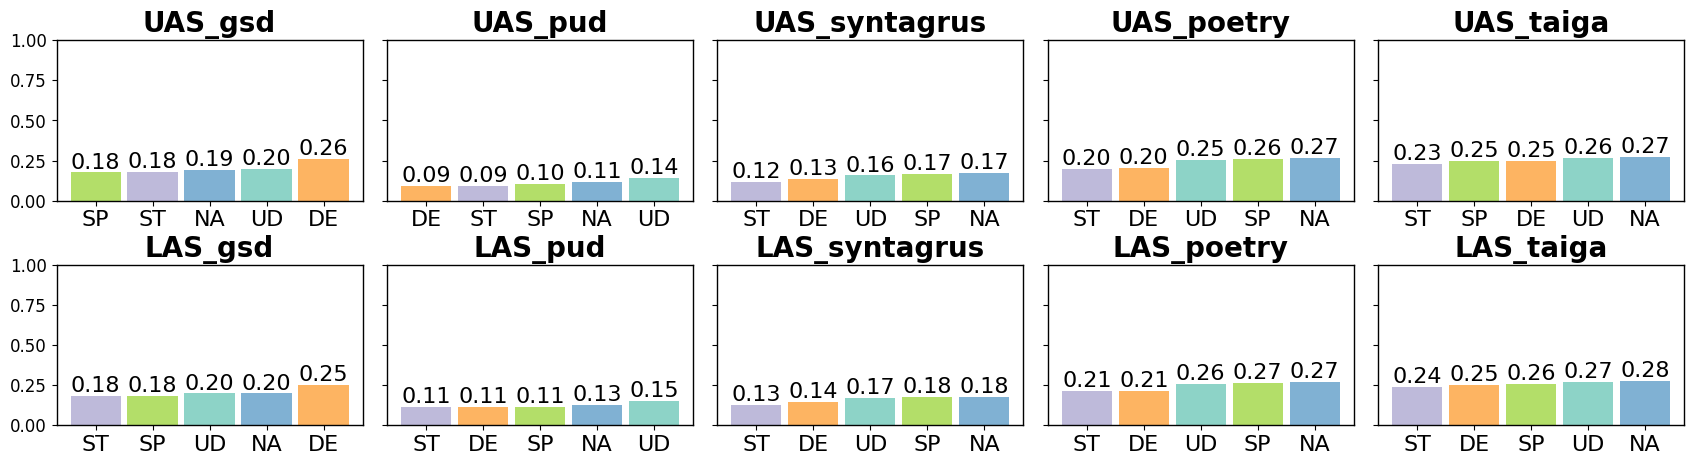

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

x_count = 2
y_count = 5
f, ax = plt.subplots(x_count, y_count, figsize=(21, 5), sharey=True)
plt.subplots_adjust(wspace=0.08, hspace=0.4)
for i, t in enumerate(treebank_names):
  u_titles, u_values = list(zip(*(sorted(dict(uas_std_df[t]).items(), key=lambda x:x[1]))))
  cur_ax = get_ax(ax, i, x_count, y_count)
  p = cur_ax.bar(u_titles, u_values, color = [parser_colors[p] for p in u_titles], width=0.88)
  cur_ax.bar_label(p, label_type='edge', fmt=lambda v: f"{v:.2f}", size=16)
  cur_ax.set_title(f"UAS_{t}", size=20, weight="bold")
  cur_ax.set_ylim([0, 1.0])
  cur_ax.set_xticks(list(range(len(u_titles))), [p[:2].upper() for p in u_titles], fontdict={'fontsize':16})
for i, t in enumerate(treebank_names):
  l_titles, l_values = list(zip(*(sorted(dict(las_std_df[t]).items(), key=lambda x:x[1]))))
  cur_ax = get_ax(ax, i + 5, x_count, y_count)
  p = cur_ax.bar(l_titles, l_values, color = [parser_colors[p] for p in l_titles],
                 width=0.88)
  cur_ax.bar_label(p, label_type='edge', fmt=lambda v: f"{v:.2f}", size=16)
  cur_ax.set_title(f"LAS_{t}", size=20, weight="bold")
  cur_ax.set_ylim([0, 1.0])
  cur_ax.set_xticks(list(range(len(l_titles))), [p[:2].upper() for p in l_titles], fontdict={'fontsize':16})
plt.savefig("/content/pics/sorted_std.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()

# IRQ

In [ ]:
uas_irq_df = pd.DataFrame([[f"{align_uas_f[t][p].quantile(0.75) - align_uas_f[t][p].quantile(0.25):.2f}"
                          for t in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)
uas_irq_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,0.29,0.22,0.18,0.43,0.44
Stanza,0.22,0.10,0.08,0.29,0.33
Natasha,0.27,0.17,0.27,0.39,0.50
DeepPavlov,0.19,0.09,0.10,0.25,0.33
spacy,0.24,0.13,0.20,0.38,0.38


In [ ]:
las_irq_df = pd.DataFrame([[f"{align_las_f[t][p].quantile(0.75) - align_las_f[t][p].quantile(0.25):.2f}"
                          for t in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)
las_irq_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,0.28,0.20,0.24,0.37,0.39
Stanza,0.21,0.14,0.12,0.32,0.35
Natasha,0.28,0.18,0.24,0.34,0.41
DeepPavlov,0.24,0.14,0.15,0.32,0.35
spacy,0.23,0.15,0.21,0.39,0.38


##UAS/LAS=0.0

In [ ]:
uas_0_df = pd.DataFrame([[f"{sum(align_uas_f[treebank][p] == 0.0)} ({sum(align_uas_f[treebank][p] == 0.0) / len(align_uas_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [ ]:
uas_0_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,2 (0%),0 (0%),21 (0%),17 (2%),24 (3%)
Stanza,1 (0%),0 (0%),16 (0%),6 (1%),12 (1%)
Natasha,1 (0%),0 (0%),31 (0%),29 (4%),24 (3%)
DeepPavlov,8 (1%),0 (0%),31 (0%),6 (1%),23 (3%)
spacy,1 (0%),0 (0%),29 (0%),31 (4%),18 (2%)


In [ ]:
las_0_df = pd.DataFrame([[f"{sum(align_las_f[treebank][p] == 0.0)} ({sum(align_las_f[treebank][p] == 0.0) / len(align_las_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [ ]:
las_0_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,3 (0%),0 (0%),25 (0%),20 (3%),30 (3%)
Stanza,3 (0%),0 (0%),17 (0%),7 (1%),14 (2%)
Natasha,2 (0%),0 (0%),35 (0%),33 (5%),34 (4%)
DeepPavlov,9 (1%),0 (0%),35 (0%),7 (1%),26 (3%)
spacy,1 (0%),0 (0%),35 (0%),33 (5%),23 (3%)


## UAS/LAS=1.0

In [ ]:
uas_1_df = pd.DataFrame([[f"{sum(align_uas_f[treebank][p] == 1.0)} ({sum(align_uas_f[treebank][p] == 1.0) / len(align_uas_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [ ]:
uas_1_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,137 (23%),282 (28%),3375 (38%),192 (26%),246 (28%)
Stanza,179 (30%),400 (40%),4708 (54%),239 (33%),294 (33%)
Natasha,121 (20%),281 (28%),2397 (27%),131 (18%),225 (26%)
DeepPavlov,221 (37%),453 (45%),4472 (51%),284 (39%),314 (36%)
spacy,177 (29%),376 (38%),3159 (36%),201 (28%),288 (33%)


In [ ]:
display(Latex(create_latex(uas_1_df)))

<IPython.core.display.Latex object>

In [ ]:
las_1_df = pd.DataFrame([[f"{sum(align_las_f[treebank][p] == 1.0)} ({sum(align_las_f[treebank][p] == 1.0) / len(align_las_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [ ]:
las_1_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,46 (8%),109 (11%),2279 (26%),137 (19%),159 (18%)
Stanza,85 (14%),192 (19%),3606 (41%),173 (24%),184 (21%)
Natasha,77 (13%),166 (17%),1601 (18%),103 (14%),147 (17%)
DeepPavlov,77 (13%),179 (18%),3247 (37%),189 (26%),194 (22%)
spacy,119 (20%),226 (23%),1920 (22%),152 (21%),199 (23%)


In [ ]:
display(Latex(create_latex(las_1_df)))

<IPython.core.display.Latex object>

In [ ]:
uas_1_df_float = pd.DataFrame([[sum(align_uas_f[treebank][p] == 1.0) / len(align_uas_f[treebank][p])
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)
las_1_df_float = pd.DataFrame([[sum(align_las_f[treebank][p] == 1.0) / len(align_las_f[treebank][p])
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

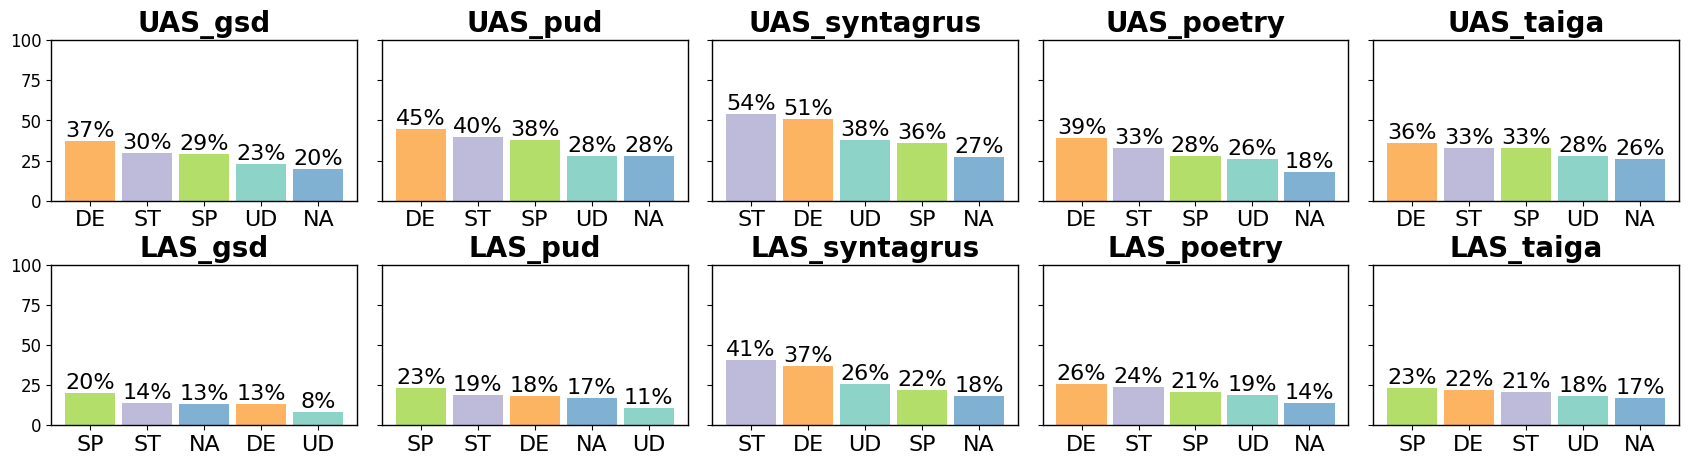

In [ ]:
import matplotlib.pyplot as plt

x_count = 2
y_count = 5

f, ax = plt.subplots(x_count, y_count, figsize=(21, 5), sharey=True)
plt.subplots_adjust(wspace=0.08, hspace=0.4)
for i, t in enumerate(treebank_names):
  u_titles, u_values = list(zip(*(sorted(dict(uas_1_df_float[t]).items(), key=lambda x:-x[1]))))
  cur_ax = get_ax(ax, i, x_count, y_count)
  p = cur_ax.bar(u_titles, [round(m * 100) for m in u_values], color = [parser_colors[p] for p in u_titles], width=0.88)
  cur_ax.bar_label(p, label_type='edge', fmt=lambda v: f"{v:.0f}%", size=16)
  cur_ax.set_title(f"UAS_{t}", size=20, weight="bold")
  cur_ax.set_ylim([0, 1.0])
  cur_ax.set_xticks(list(range(len(u_titles))), [p[:2].upper() for p in u_titles], fontdict={'fontsize':16})
for i, t in enumerate(treebank_names):
  l_titles, l_values = list(zip(*(sorted(dict(las_1_df_float[t]).items(), key=lambda x:-x[1]))))
  cur_ax = get_ax(ax, i + 5, x_count, y_count)
  p = cur_ax.bar(l_titles, [round(m * 100) for m in l_values], color = [parser_colors[p] for p in l_titles],
                 width=0.88)
  cur_ax.bar_label(p, label_type='edge', fmt=lambda v: f"{v:.0f}%", size=16)
  cur_ax.set_title(f"LAS_{t}", size=20, weight="bold")
  cur_ax.set_ylim([0, 100])
  cur_ax.set_xticks(list(range(len(l_titles))), [p[:2].upper() for p in l_titles], fontdict={'fontsize':16})
plt.savefig("/content/pics/sorted_1.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
p.__dict__

{'patches': [<matplotlib.patches.Rectangle at 0x796c7346d7b0>,
 'errorbar': None,
 'datavalues': array([0.22587968, 0.22020431, 0.20885358, 0.18047673, 0.16685585]),
 'orientation': 'vertical',
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x796c7346e200>,
 '_remove_method': <function list.remove(value, /)>,
 '_label': '_container0',
 'stale': True}

## Distributions

In [ ]:
def draw_hboxplot(ax_plot, data, p):
    b = ax_plot.boxplot(x=data, showfliers=False,showcaps=True,showmeans=True,
            meanprops={'color':'green', 'linewidth': 4, 'linestyle':'solid'},
            medianprops={'color': 'blue', 'linewidth': 3},
            vert=False, meanline=True, widths=0.3)
    ax_plot.set_xlim([-0.02, 1.02])
    ax_plot.get_yaxis().set_visible(False)
    c = b['caps'][0]._x[0]
    ax_plot.text(
          c, # x-coordinate
          0.79, # y-coordinate
          f'{c:.2}', # text
          horizontalalignment='center', # centered
          fontsize=12, # small font size
      )

    u_q1 = data.quantile(0.25)
    ax_plot.text(
        u_q1, # x-coordinate
        0.65, # y-coordinate
        f'{u_q1:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
    )
    u_q2 = data.quantile(0.5)
    if u_q2 != 1.0:
      ax_plot.text(
        u_q2, # x-coordinate
        0.5, # y-coordinate
        f'{u_q2:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
        color='blue'
      )
    u_q3 = data.quantile(0.75)
    if u_q3 != 1.0:
      ax_plot.text(
        u_q3, # x-coordinate
        0.35, # y-coordinate
        f'{u_q3:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
      )

    u_mean = data.mean()
    if u_mean != 1.0:
      ax_plot.text(
            u_mean, # x-coordinate
            1.2, # y-coordinate
            f'{u_mean:.2}', # text
            horizontalalignment='center', # centered
            fontsize=12, # small font size
            color='green'
      )
    #ax_plot.title.set_text(f"{p}_UAS")

In [ ]:
step2 = 0.02
max2 = 50
bins2 = [round(step2 * i, 2) for i in range(0, max2)] + [1.01]
bins2

[0.0,
 0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.82,
 0.84,
 0.86,
 0.88,
 0.9,
 0.92,
 0.94,
 0.96,
 0.98,
 1.01]

In [ ]:
step = 0.2
[round(step * i, 1) for i in range(0, 6)] + [1.01]

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.01]

In [ ]:
def draw_hist(ax_plot, data):
      step = 0.2
      bins1 = [round(step * i, 1) for i in range(0, 6)] + [1.01]
      v_5 = ax_plot.hist(data, bins=bins1, color="white", edgecolor='grey',
                         linewidth=0.4)
      for i, v in enumerate(v_5[0]):
        rate = round(v / len(data) * 100)
        if rate >= 5:
          if i == len(v_5[0]) - 1:
            text_color = 'red'
          else:
            text_color = 'grey'
          ax_plot.text(i * step, v + len(data) / 20, f"{rate}%", color=text_color, size=12)
      step2 = 0.05
      max2 = 20
      bins2 = [round(step2 * i, 2) for i in range(0, max2 + 1)] + [1.01]
      v_20 = ax_plot.hist(data, bins=bins2)
      v_20[2][-1].set_facecolor('red')
      ax_plot.set_ylim([0, len(data)])
      ax_plot.set_xlim([-0.02, 1.2])
      xlabels = [round(0.2 * i, 2) for i in range(0, 6)]
      ax_plot.set_xticks(xlabels, xlabels, fontdict={'fontsize':12})

In [ ]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
def draw_diagrams(data, file_title):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    matplotlib.rcParams['axes.linewidth'] = 1

    fig = plt.figure(figsize = (16,24))

    gs = gridspec.GridSpec(4 * len(treebank_names), len(parser_names), figure=fig,
                  wspace=0.1, hspace=0.5,
                  height_ratios=(0.01, 0.01,  0.09, 0.09) * len(treebank_names))


    for treebank_i, t in enumerate(treebank_names):
      ax_t = fig.add_subplot(gs[4 * treebank_i, :])
      ax_t.text(0.5, 0.8, t, va="top", ha="center", fontsize=24, weight="bold")
      if treebank_i != 0:
        ax_t.axhline(y=1, color='gray', lw=1)
      ax_t.axis('off')

      for parser_i, p in enumerate(parser_names):
          ax_tp = fig.add_subplot(gs[4 * treebank_i + 1, parser_i])
          ax_tp.text(0.5, 0.5, p, va="top", ha="center", fontsize=18)
          ax_tp.axis('off')

          ax_h = fig.add_subplot(gs[4 * treebank_i + 2, parser_i])
          if parser_i != 0:
              ax_h.get_yaxis().set_visible(False)
          draw_hist(ax_h, data[t][p])

          ax_b = fig.add_subplot(gs[4 * treebank_i + 3, parser_i])
          draw_hboxplot(ax_b, data[t][p], p)
          ax_b.get_xaxis().set_visible(False)
          ax_b.axis('off')


    plt.savefig(file_title, format='eps', dpi=300, bbox_inches='tight')

    plt.show()


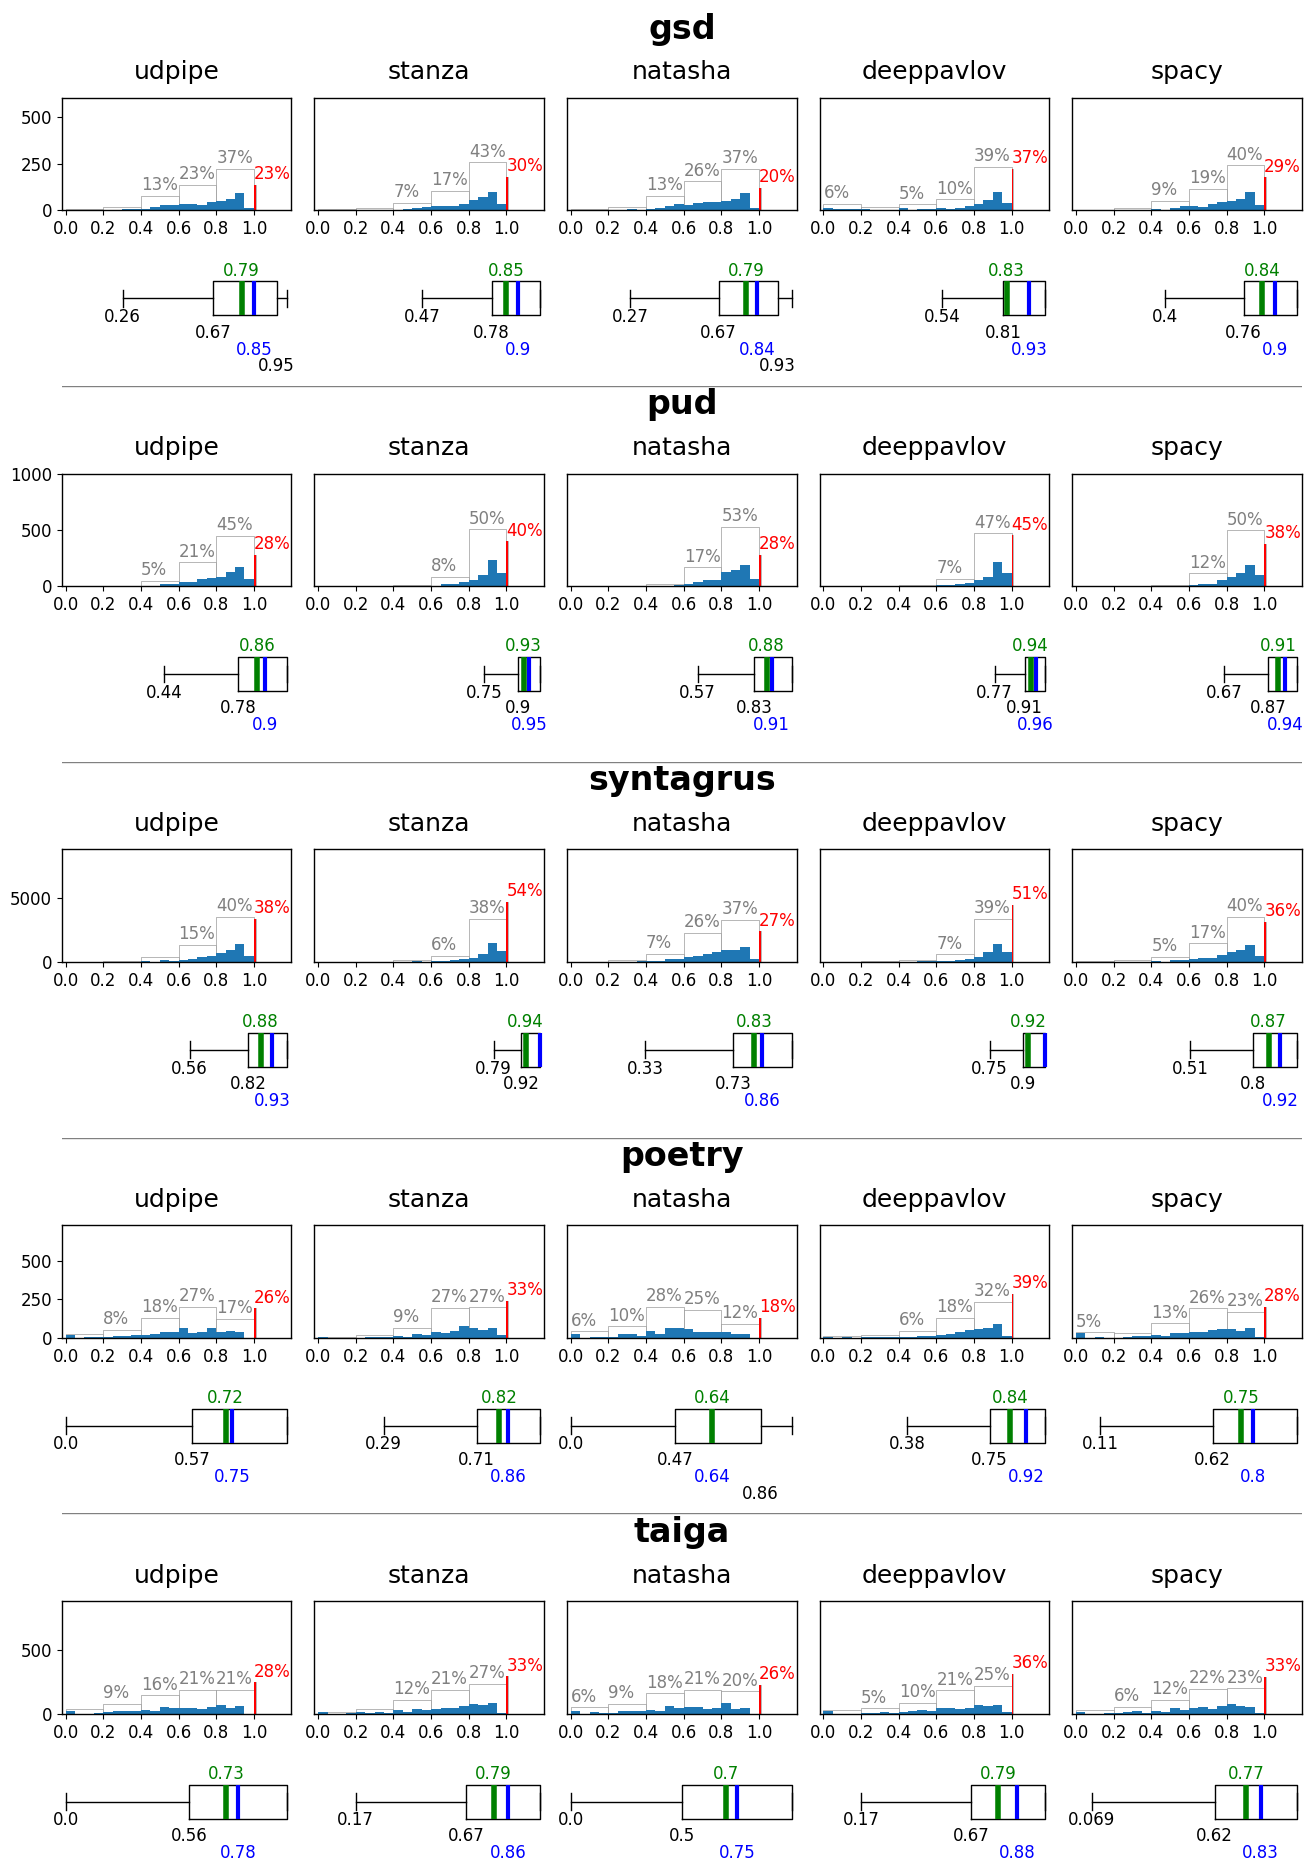

In [ ]:
draw_diagrams(align_uas_f, 'pics/uas.eps')

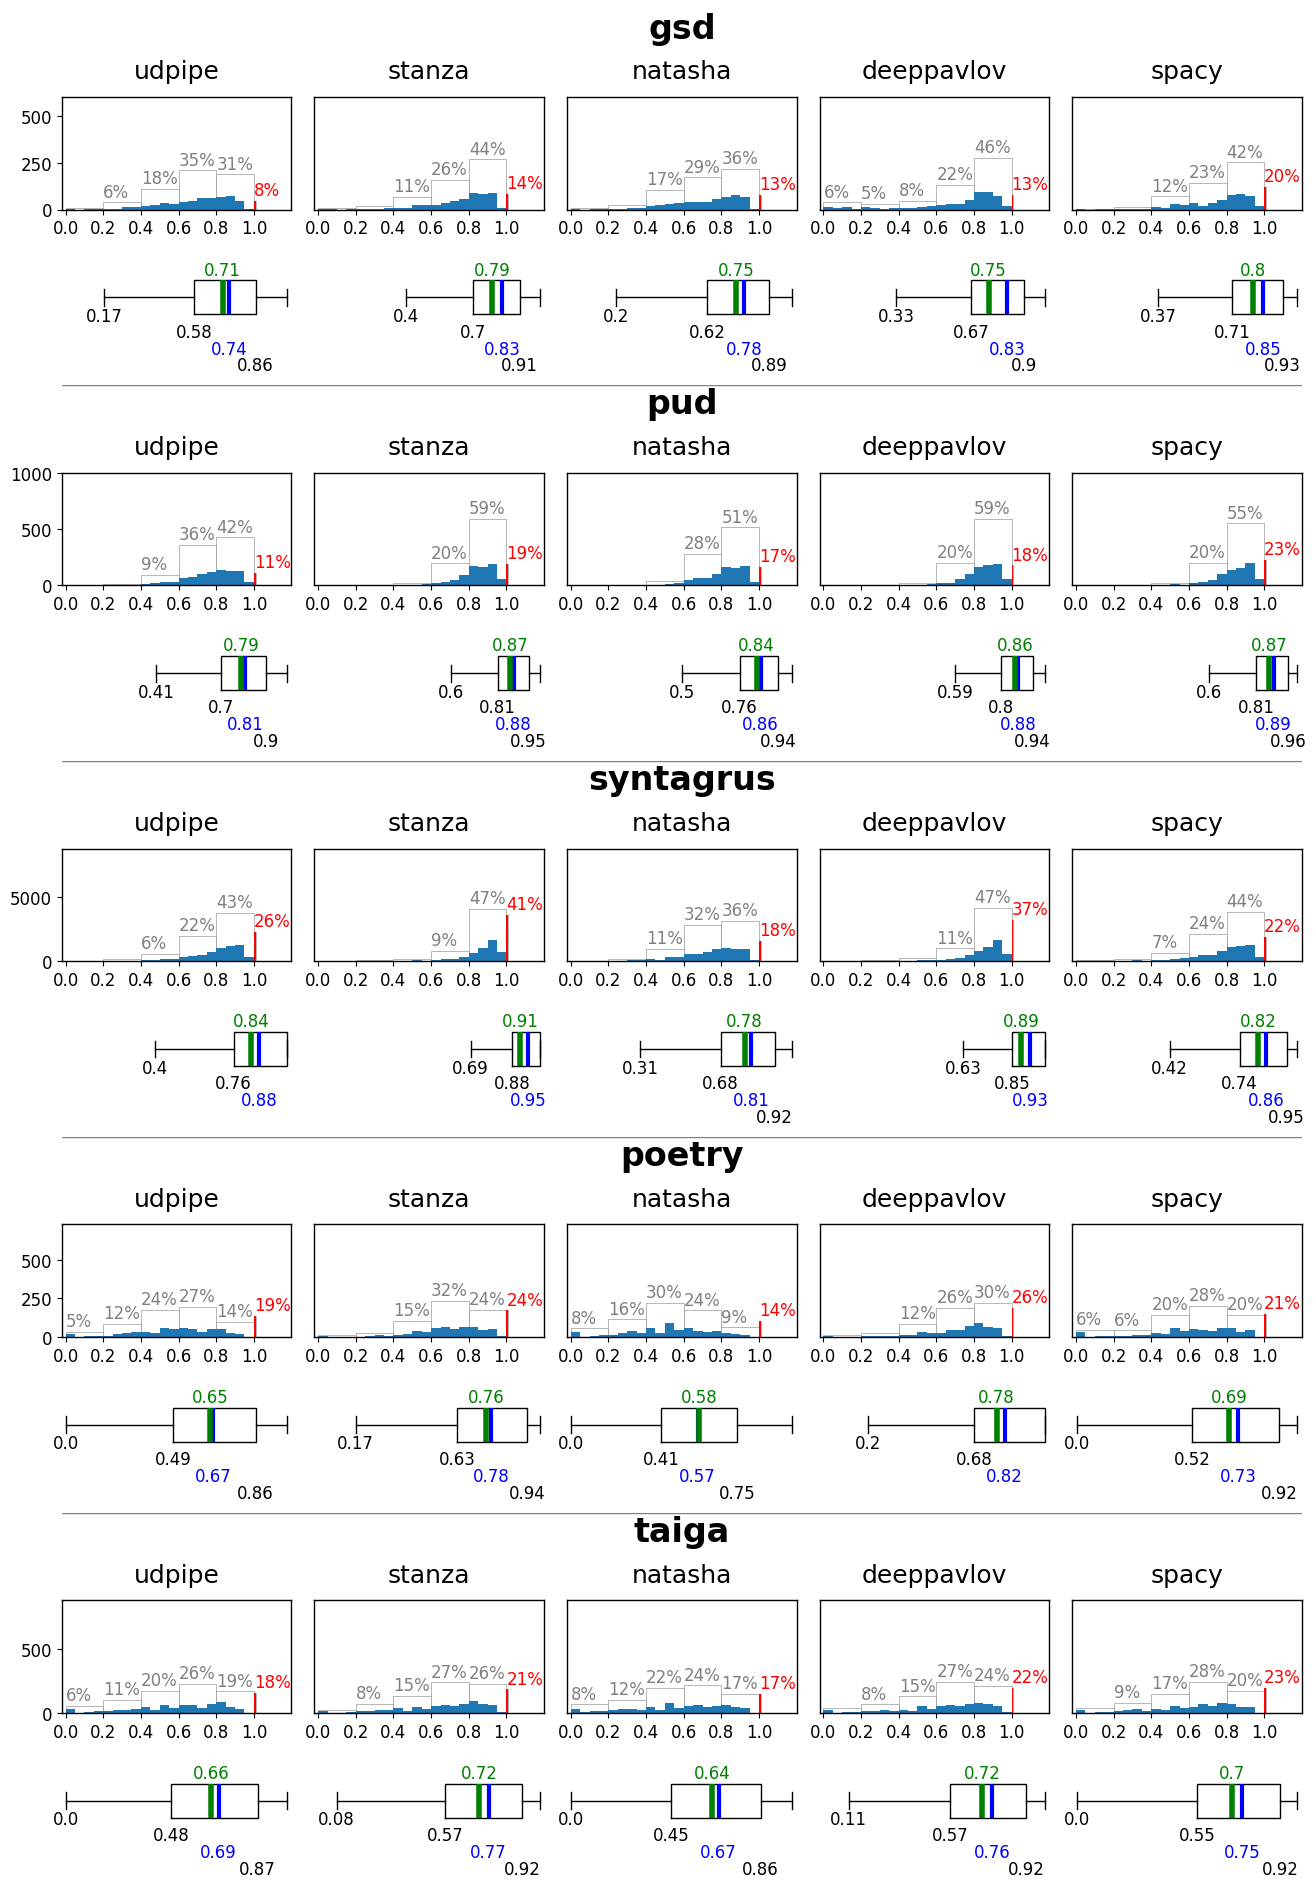

In [ ]:
draw_diagrams(align_las_f, 'pics/las.eps')

# Result saving

In [ ]:
import shutil
shutil.make_archive('pics', 'tar', '/content/pics/')

'/content/pics.tar'

In [ ]:
from google.colab import files
files.download('pics.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Time results

In [ ]:
# all parsing, in seconds (from parser running notebook)
all_time_dict = {}
all_time_dict['gsd'] = {'udpipe': 10.036, 'stanza': 481.504, 'natasha': 3.267, 'deeppavlov': 131.280,'spacy': 12.119}
all_time_dict['pud'] = {'udpipe': 18.135, 'stanza': 830.284, 'natasha': 4.613, 'deeppavlov': 193.175,'spacy': 21.383}
all_time_dict['syntagrus'] = {'udpipe': 137.007, 'stanza': 7495.900, 'natasha': 49.834, 'deeppavlov': 1613.516,'spacy': 172.897}
all_time_dict['poetry'] = {'udpipe': 8.961, 'stanza': 469.055, 'natasha': 2.908, 'deeppavlov': 118.674,'spacy': 12.741}
all_time_dict['taiga'] = {'udpipe': 8.741, 'stanza': 532.078, 'natasha': 3.381, 'deeppavlov': 130.404,'spacy': 13.954}

In [ ]:
avg_time_dict = {t: {} for t in treebank_names}
for t in treebank_names:
  for p in parser_names:
    avg_time_dict[t][p] = all_time_dict[t][p] / len(treebanks[t])

In [ ]:
avg_time_df = pd.DataFrame([[avg_time_dict[treebank][p]
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [ ]:
{p: [avg_time_dict[t][p] for t in treebank_names] for p in parser_names}

{'udpipe': [0.01669883527454243,
  0.018135000000000002,
  0.015568977272727273,
  0.012309065934065935,
  0.009921679909194098],
 'stanza': [0.801171381031614,
  0.830284,
  0.8518068181818181,
  0.6443063186813187,
  0.6039477866061294],
 'natasha': [0.00543594009983361,
  0.004613000000000001,
  0.005662954545454546,
  0.0039945054945054945,
  0.0038376844494892167],
 'deeppavlov': [0.2184359400998336,
  0.193175,
  0.1833540909090909,
  0.16301373626373628,
  0.14801816118047673],
 'spacy': [0.020164725457570715,
  0.021383,
  0.019647386363636363,
  0.017501373626373627,
  0.015838819523269012]}

In [ ]:
avg_time_df.iloc['treebank average'] = {p: [avg_time_dict[t][p] for t in treebank_names] for p in parser_names}

ValueError: Incompatible indexer with Series

In [ ]:
avg_time_df.round(3)

In [ ]:
display(Latex(create_latex(avg_time_df.round(3).astype('str'))))

In [ ]:
for p in parser_names:
  p_times = [avg_time_dict[t][p] for t in treebank_names]
  print(p, f"{sum(p_times) / len(p_times):.3f} s")